<a href="https://colab.research.google.com/github/sonyerim/Waste-Classification/blob/main/Waste_Classification_using_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/teamsmcorg/Waste-Classification-using-YOLOv8/blob/main/waste_YOLOv8.ipynb
돌려보기

In [13]:
!nvidia-smi

Thu Jun 20 06:05:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [14]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [15]:
!pip install ultralytics

In [16]:
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.6/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

numpy               ✅ 1.25.2<2.0.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


In [17]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GU4mhuwv8vHYi5IzBfep")
project = rf.workspace("waste-detection-oss-prj").project("8-color-bird-waste-detection")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.36, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to 8-color-bird---Waste-Detection-4 in yolov8:: 100%|██████████| 2702/2702 [00:00<00:00, 7842.59it/s]


In [19]:
import os

# 데이터셋 경로 확인
dataset_dir = dataset.location
print(f"Dataset directory: {dataset_dir}")

# 데이터셋 내 파일 확인
print("Files in dataset directory:")
print(os.listdir(dataset_dir))

Dataset directory: /content/8-color-bird---Waste-Detection-4
Files in dataset directory:
['README.dataset.txt', 'train', 'data.yaml', 'test', 'valid', 'README.roboflow.txt']


In [20]:
data_yaml_path = os.path.join(dataset_dir, 'data.yaml')

# data.yaml 파일 내용 확인
with open(data_yaml_path, 'r') as file:
    data_yaml_content = file.read()

print("data.yaml content:")
print(data_yaml_content)

data.yaml content:
names:
- can
- glass
- paper
- pet
- plastic
- styrofoam
- vinyl
nc: 7
roboflow:
  license: CC BY 4.0
  project: 8-color-bird-waste-detection
  url: https://universe.roboflow.com/waste-detection-oss-prj/8-color-bird-waste-detection/dataset/4
  version: 4
  workspace: waste-detection-oss-prj
test: ../test/images
train: 8-color-bird---Waste-Detection-4/train/images
val: 8-color-bird---Waste-Detection-4/valid/images



In [23]:
import os

# 데이터셋 경로
dataset_dir = '/content/8-color-bird---Waste-Detection-4'

# data.yaml 파일 경로
data_yaml_path = os.path.join(dataset_dir, 'data.yaml')

# data.yaml 파일 내용 읽기
with open(data_yaml_path, 'r') as file:
    data_yaml_content = file.read()

# 기존 경로를 실제 경로로 수정
data_yaml_content = data_yaml_content.replace('8-color-bird---Waste-Detection-4/train/images', f'{dataset_dir}/train/images')
data_yaml_content = data_yaml_content.replace('8-color-bird---Waste-Detection-4/valid/images', f'{dataset_dir}/valid/images')

# 수정된 내용을 data.yaml 파일에 다시 저장
with open(data_yaml_path, 'w') as file:
    file.write(data_yaml_content)

print("data.yaml 파일이 수정되었습니다.")

data.yaml 파일이 수정되었습니다.


In [24]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=800

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/8-color-bird---Waste-Detection-4/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

In [25]:
from IPython.display import display, Image

In [26]:
!ls {HOME}/runs/detect/train4

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1718863763.230605c5908a.6253.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1480.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1481.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1482.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


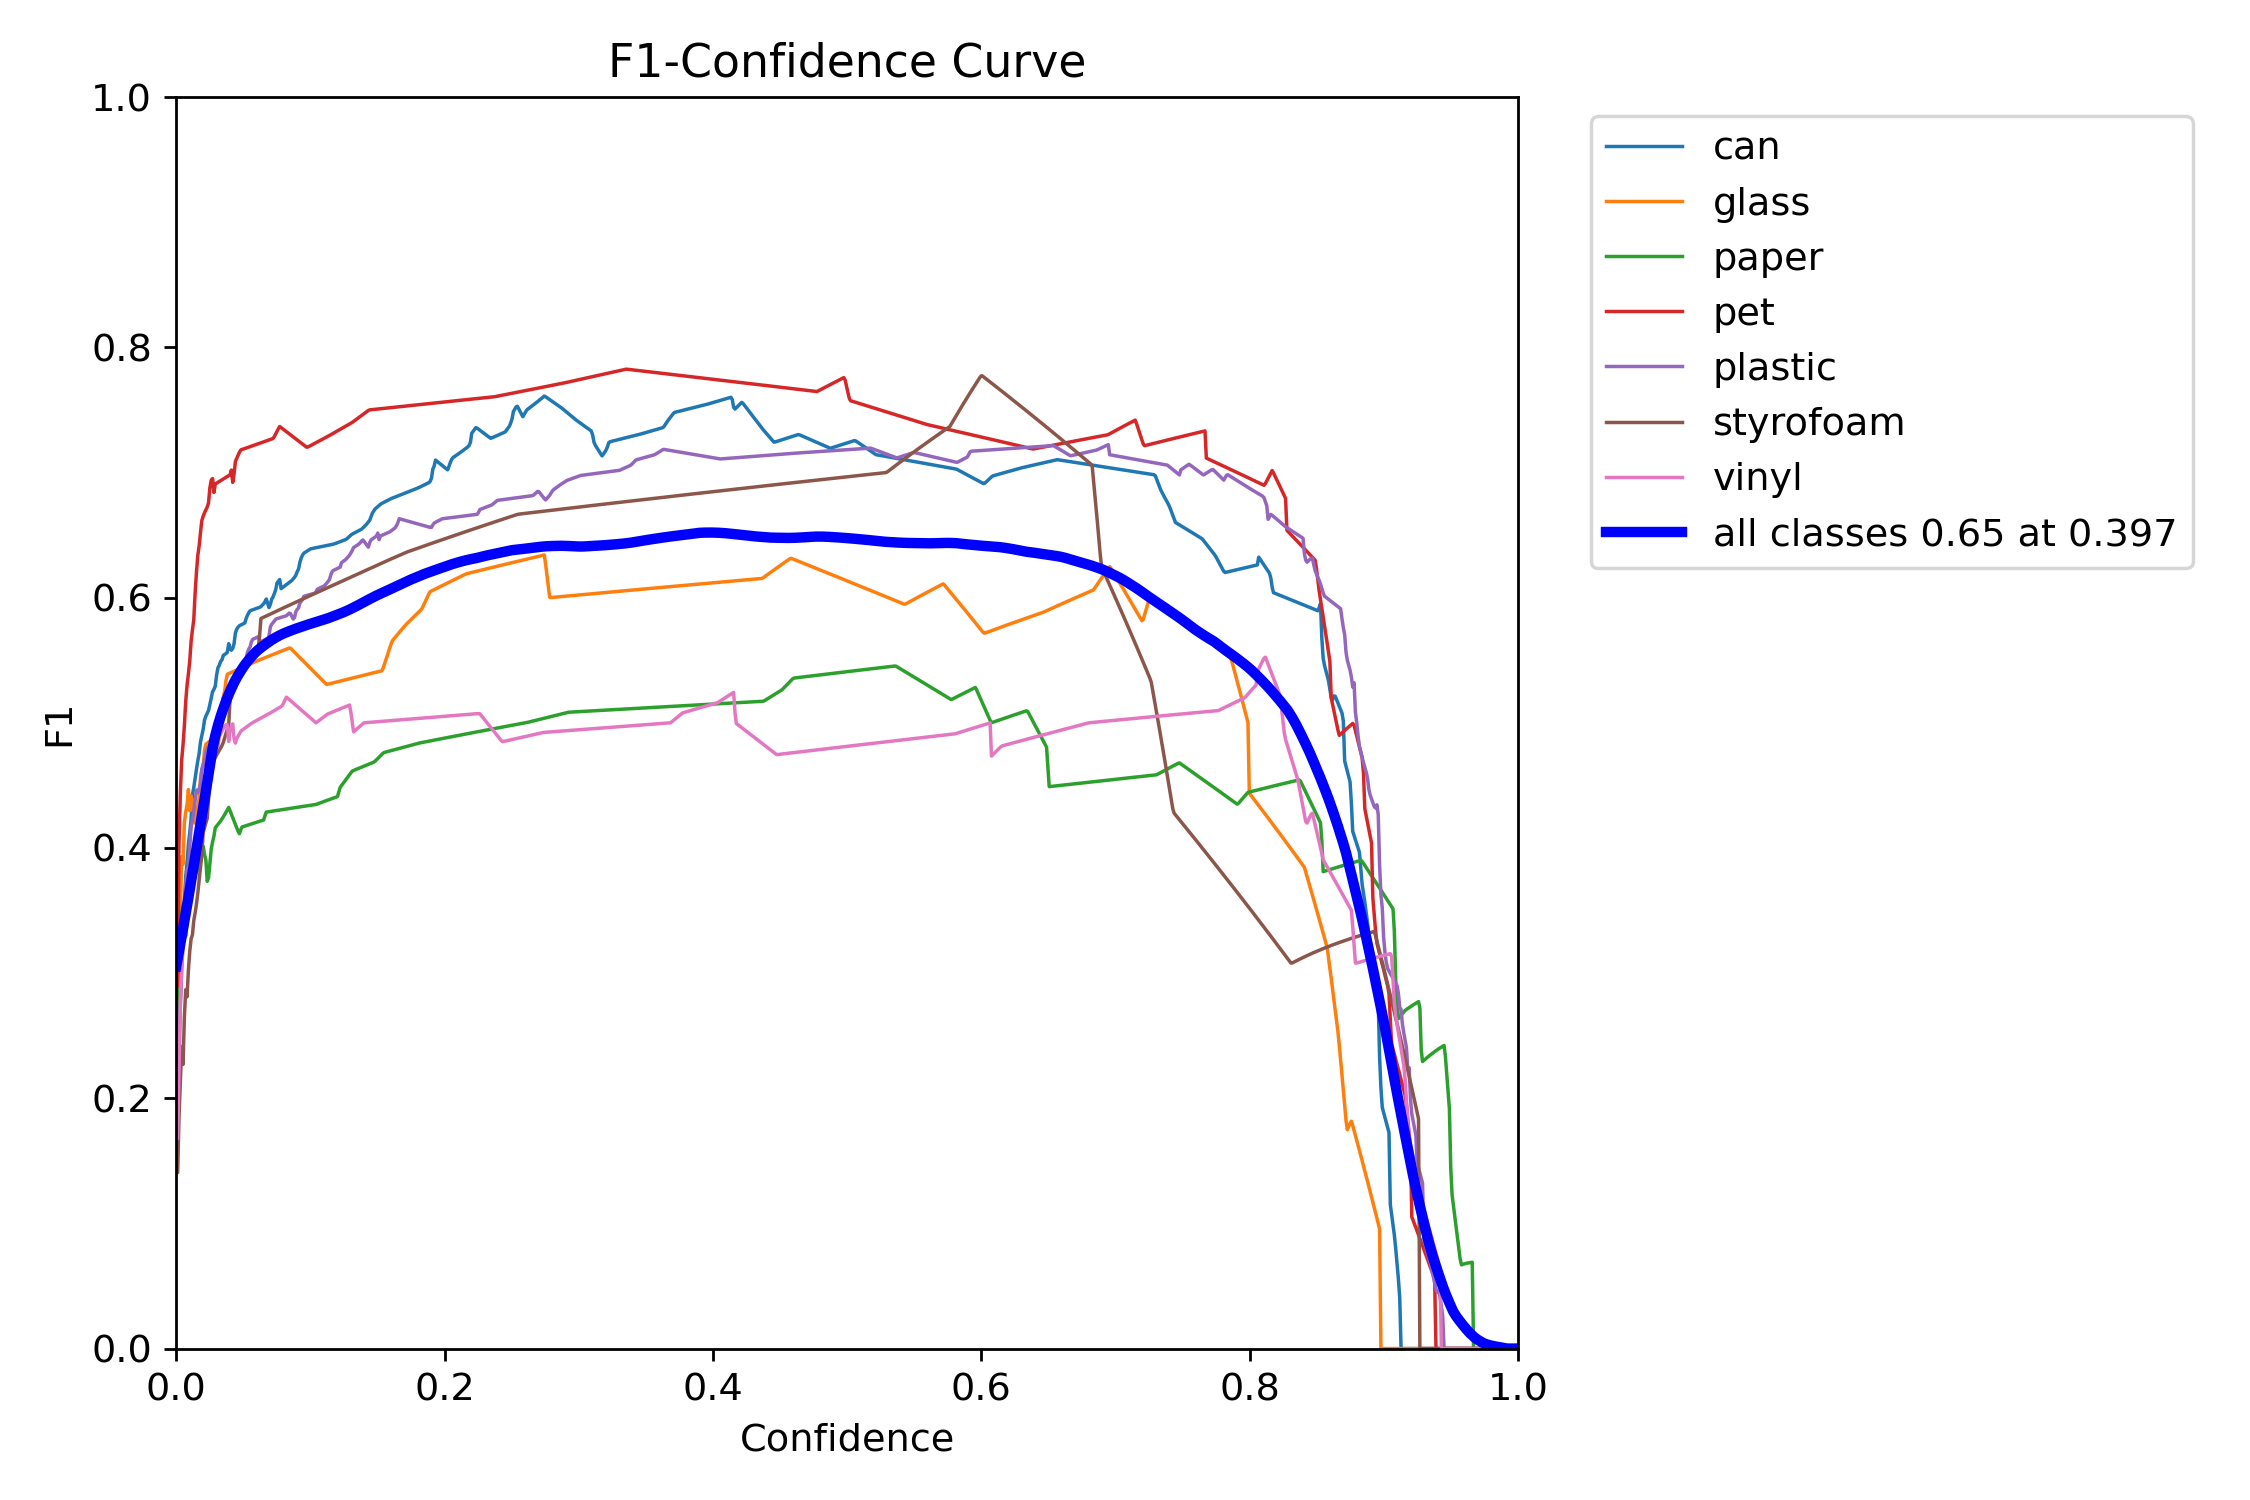

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/F1_curve.png', width=600)

/content


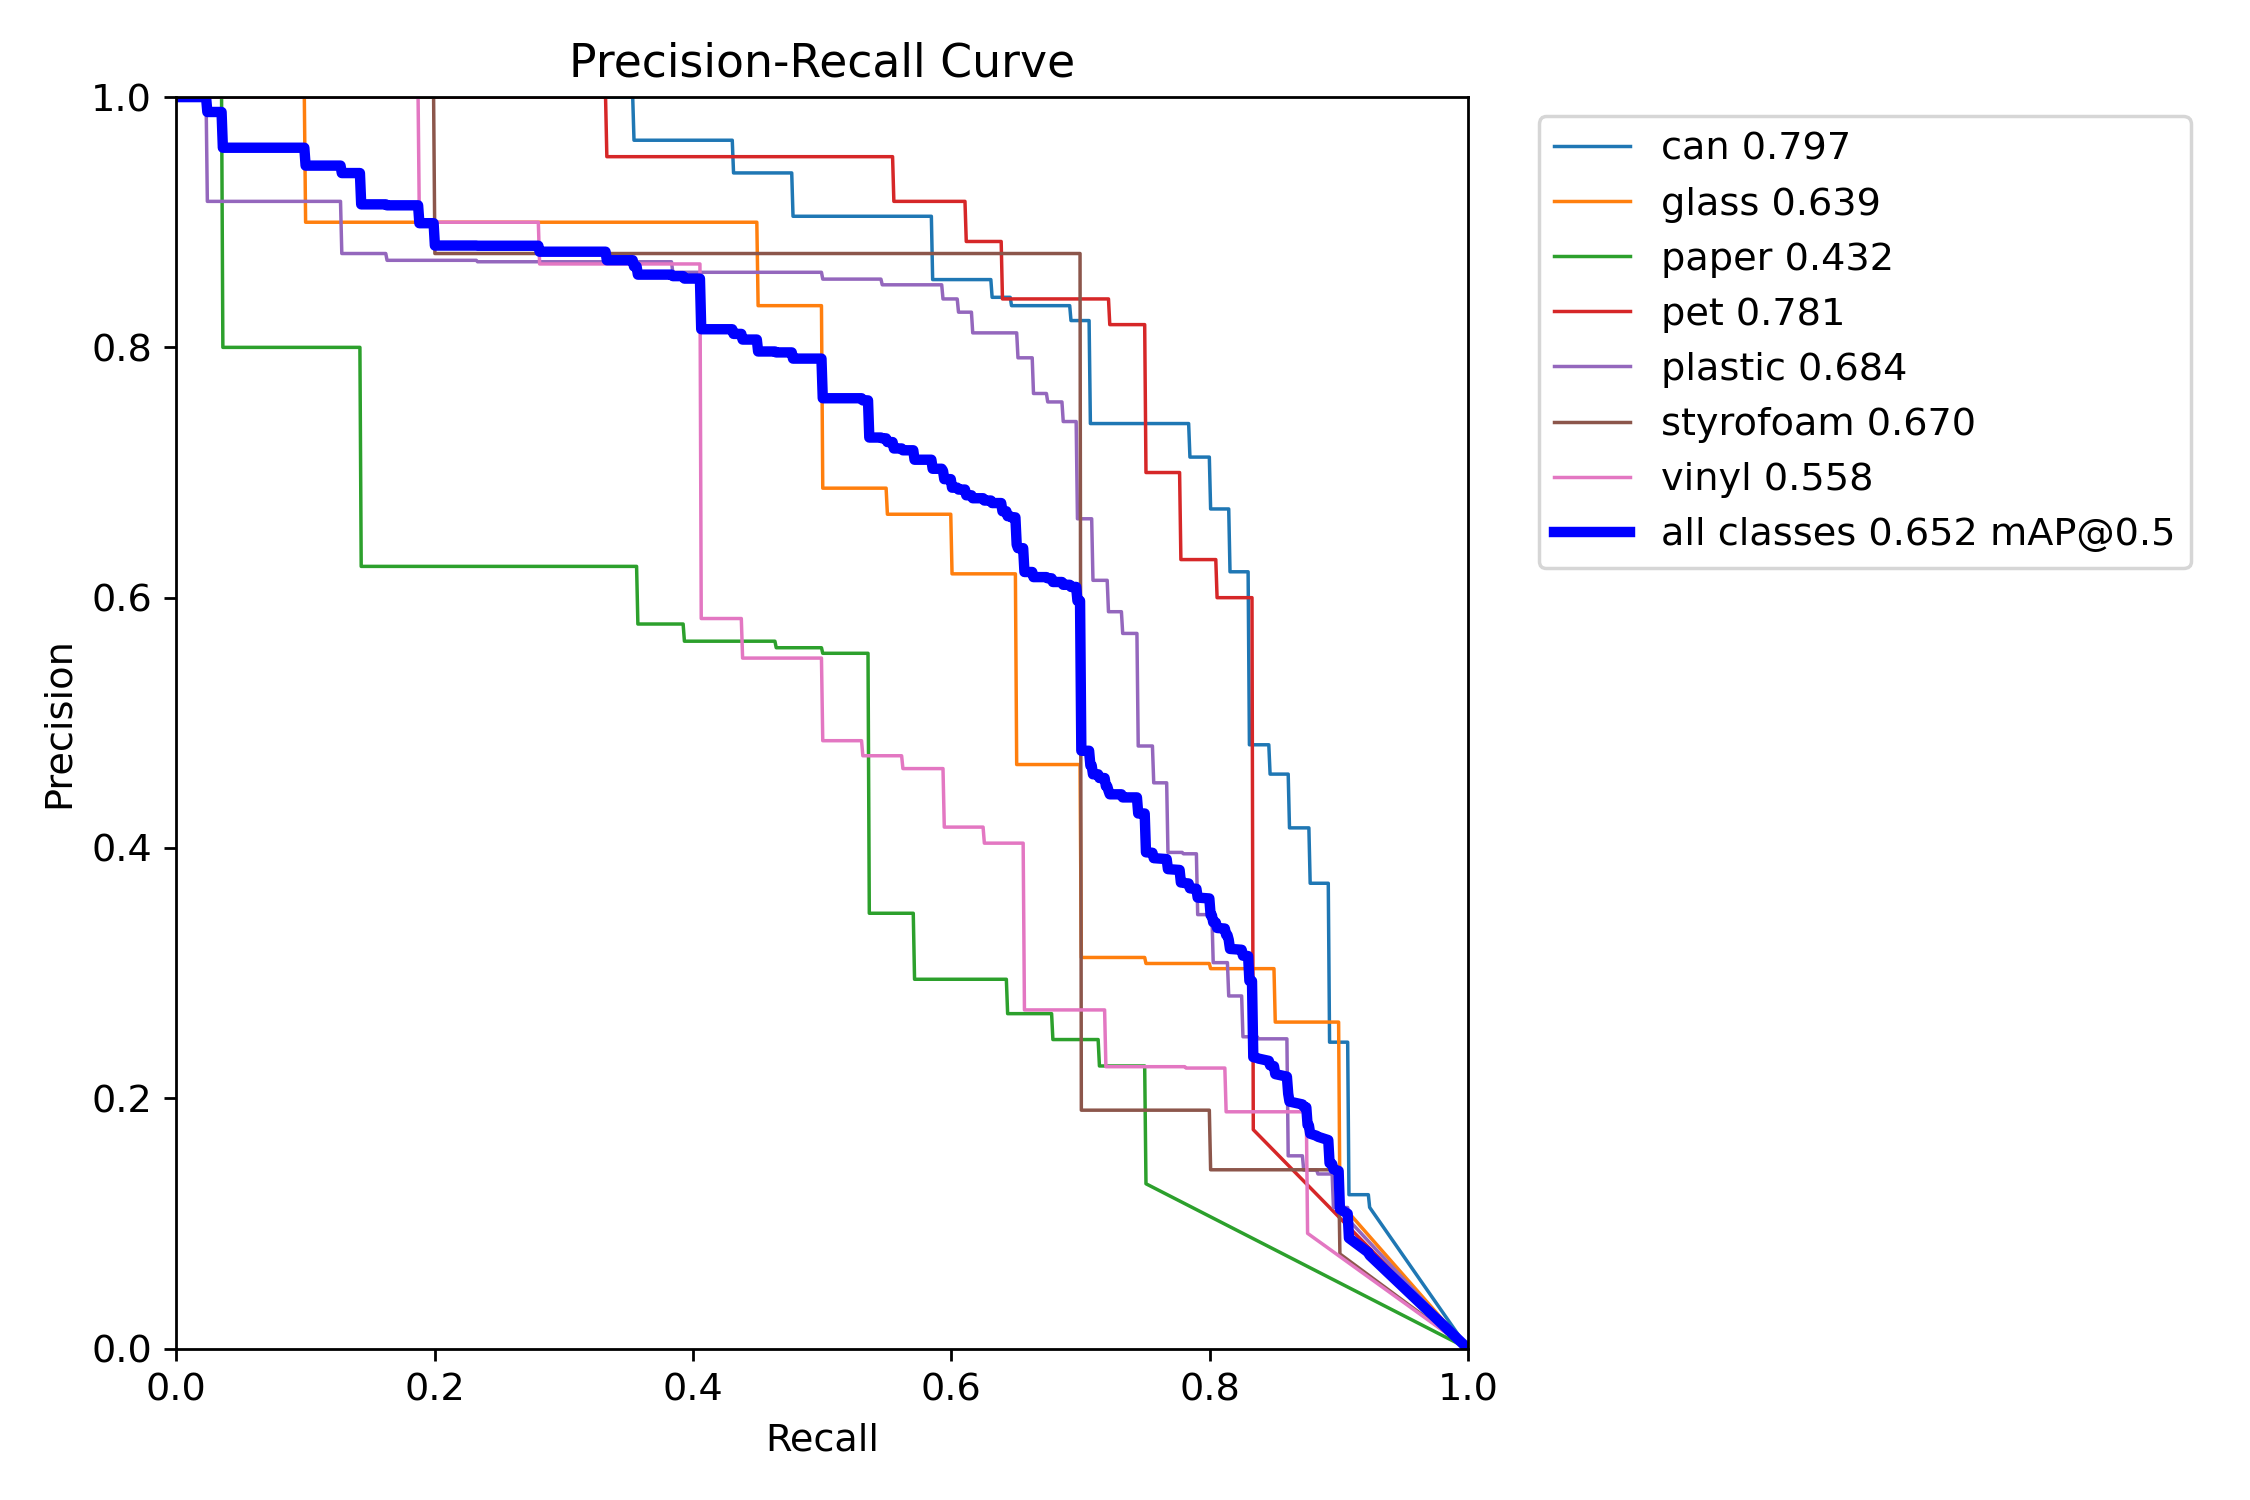

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/PR_curve.png', width=800)

/content


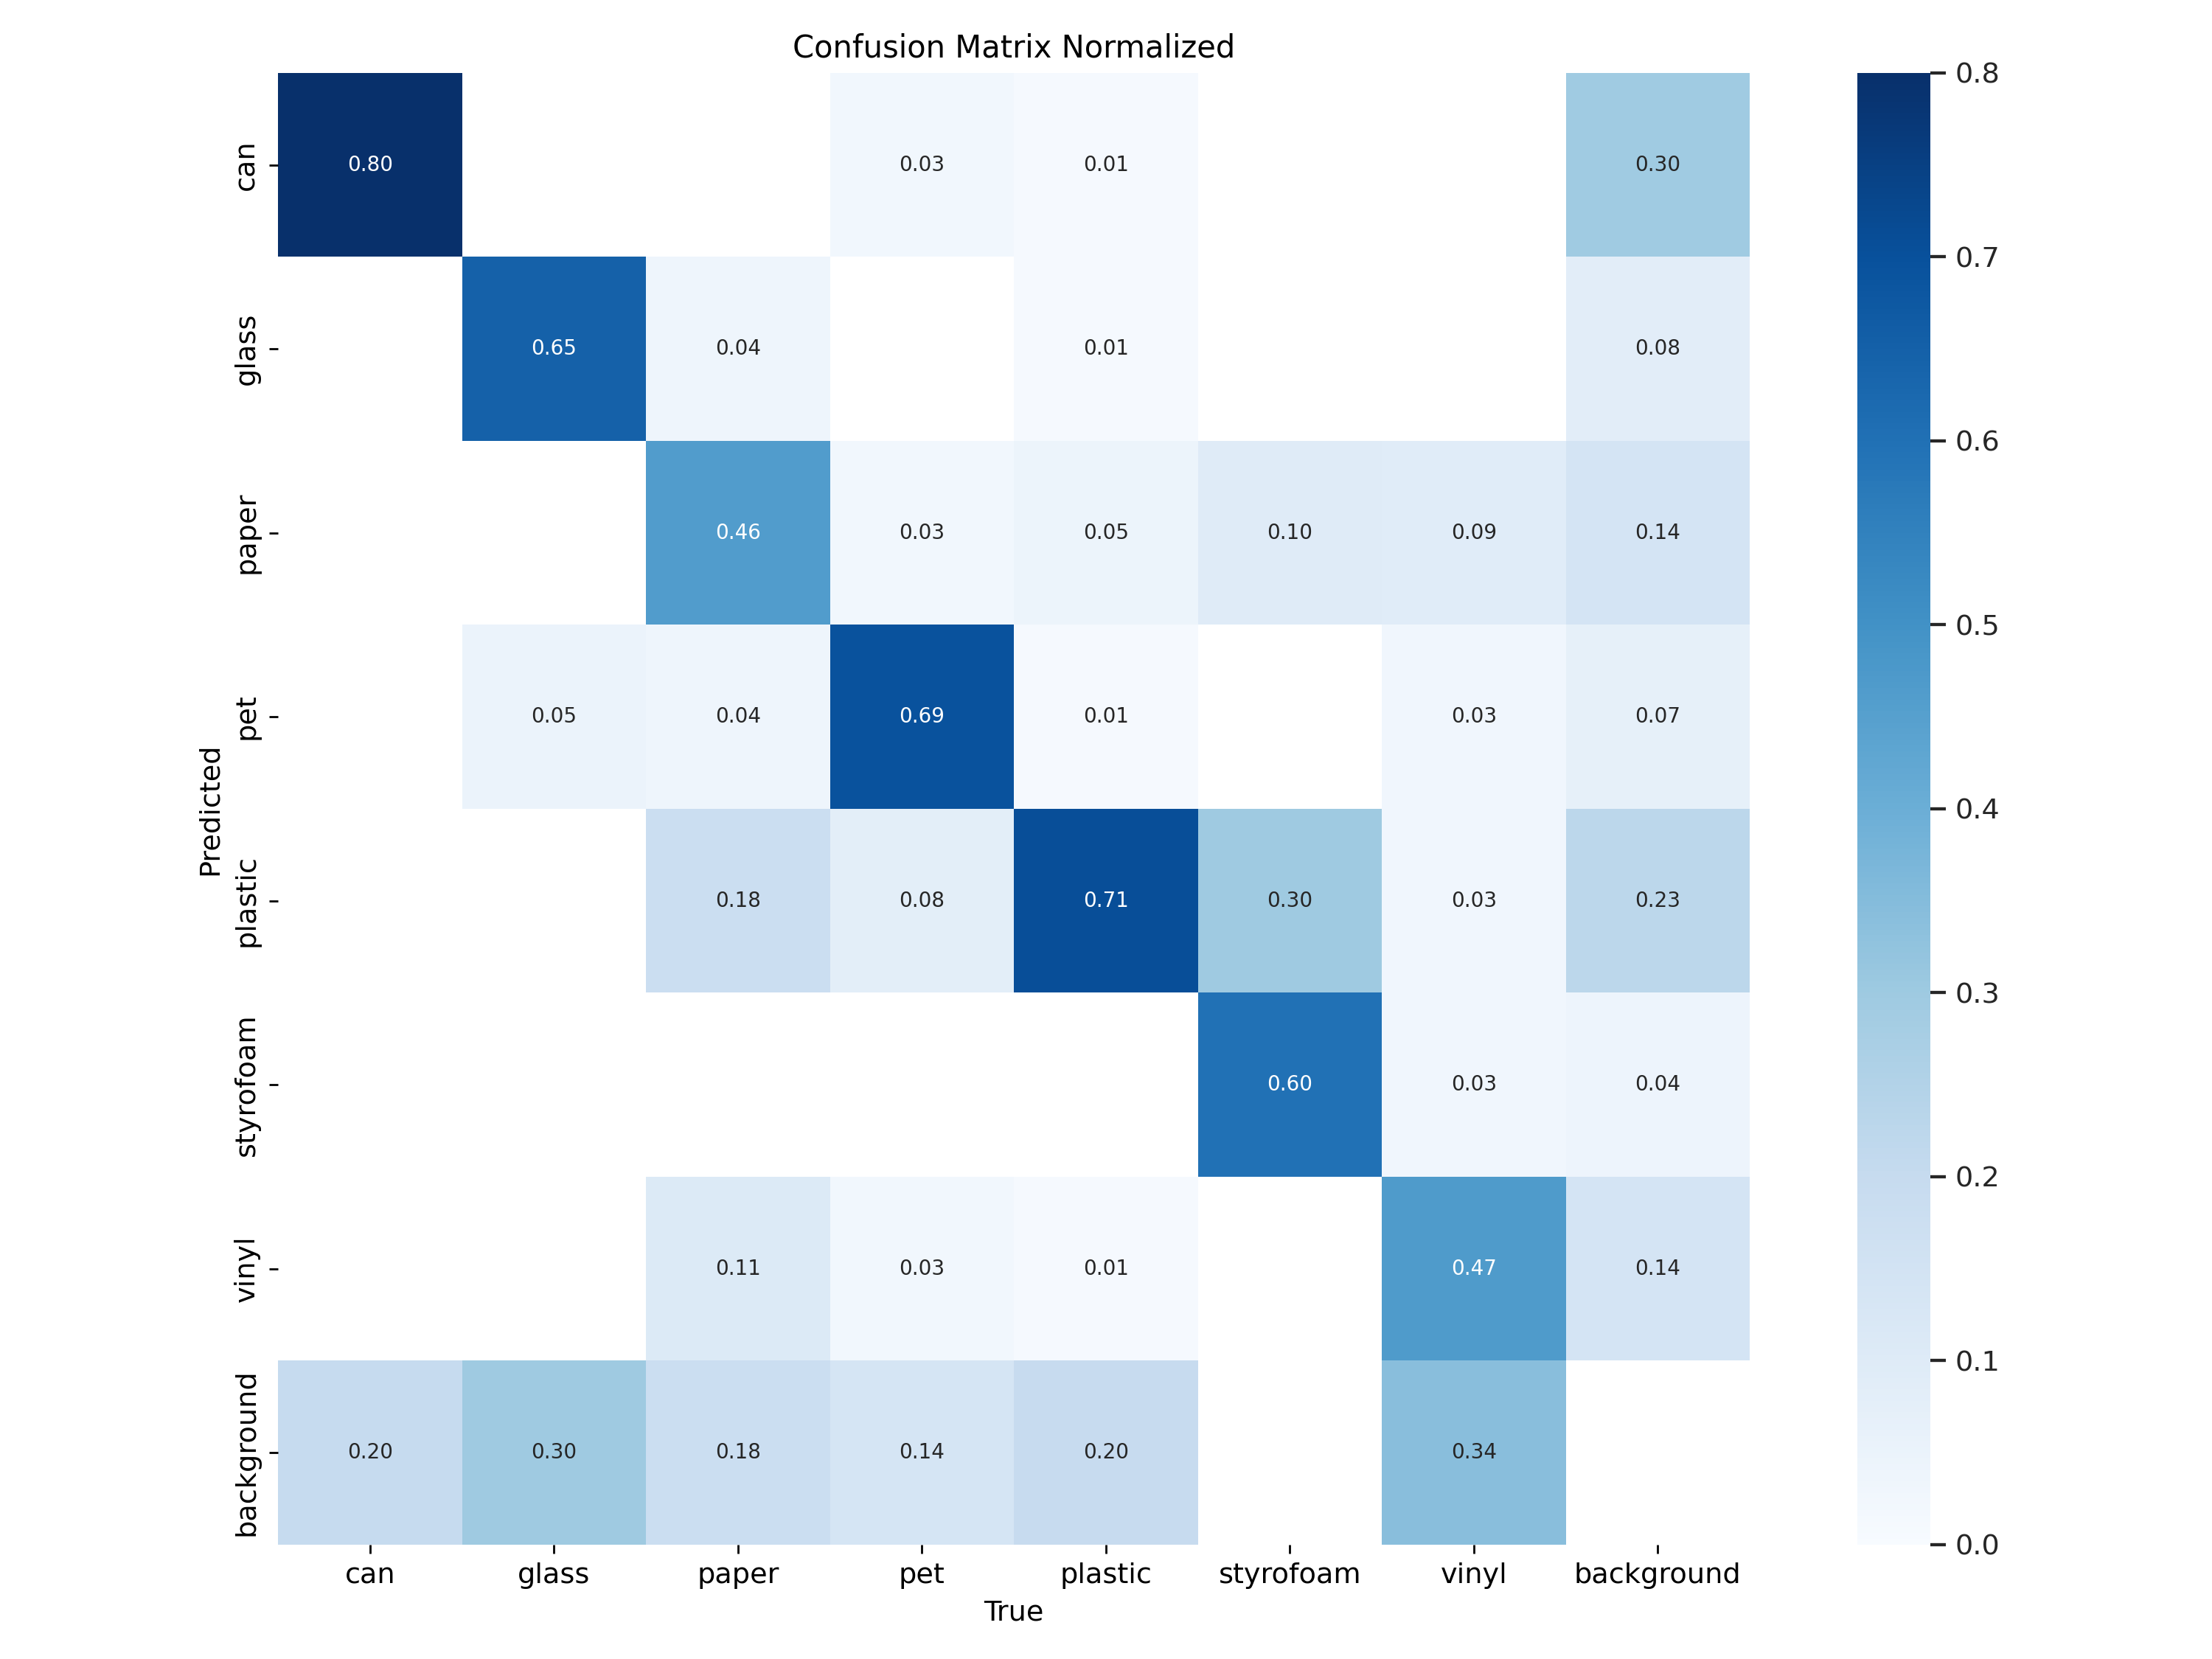

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix_normalized.png', width=800)

/content


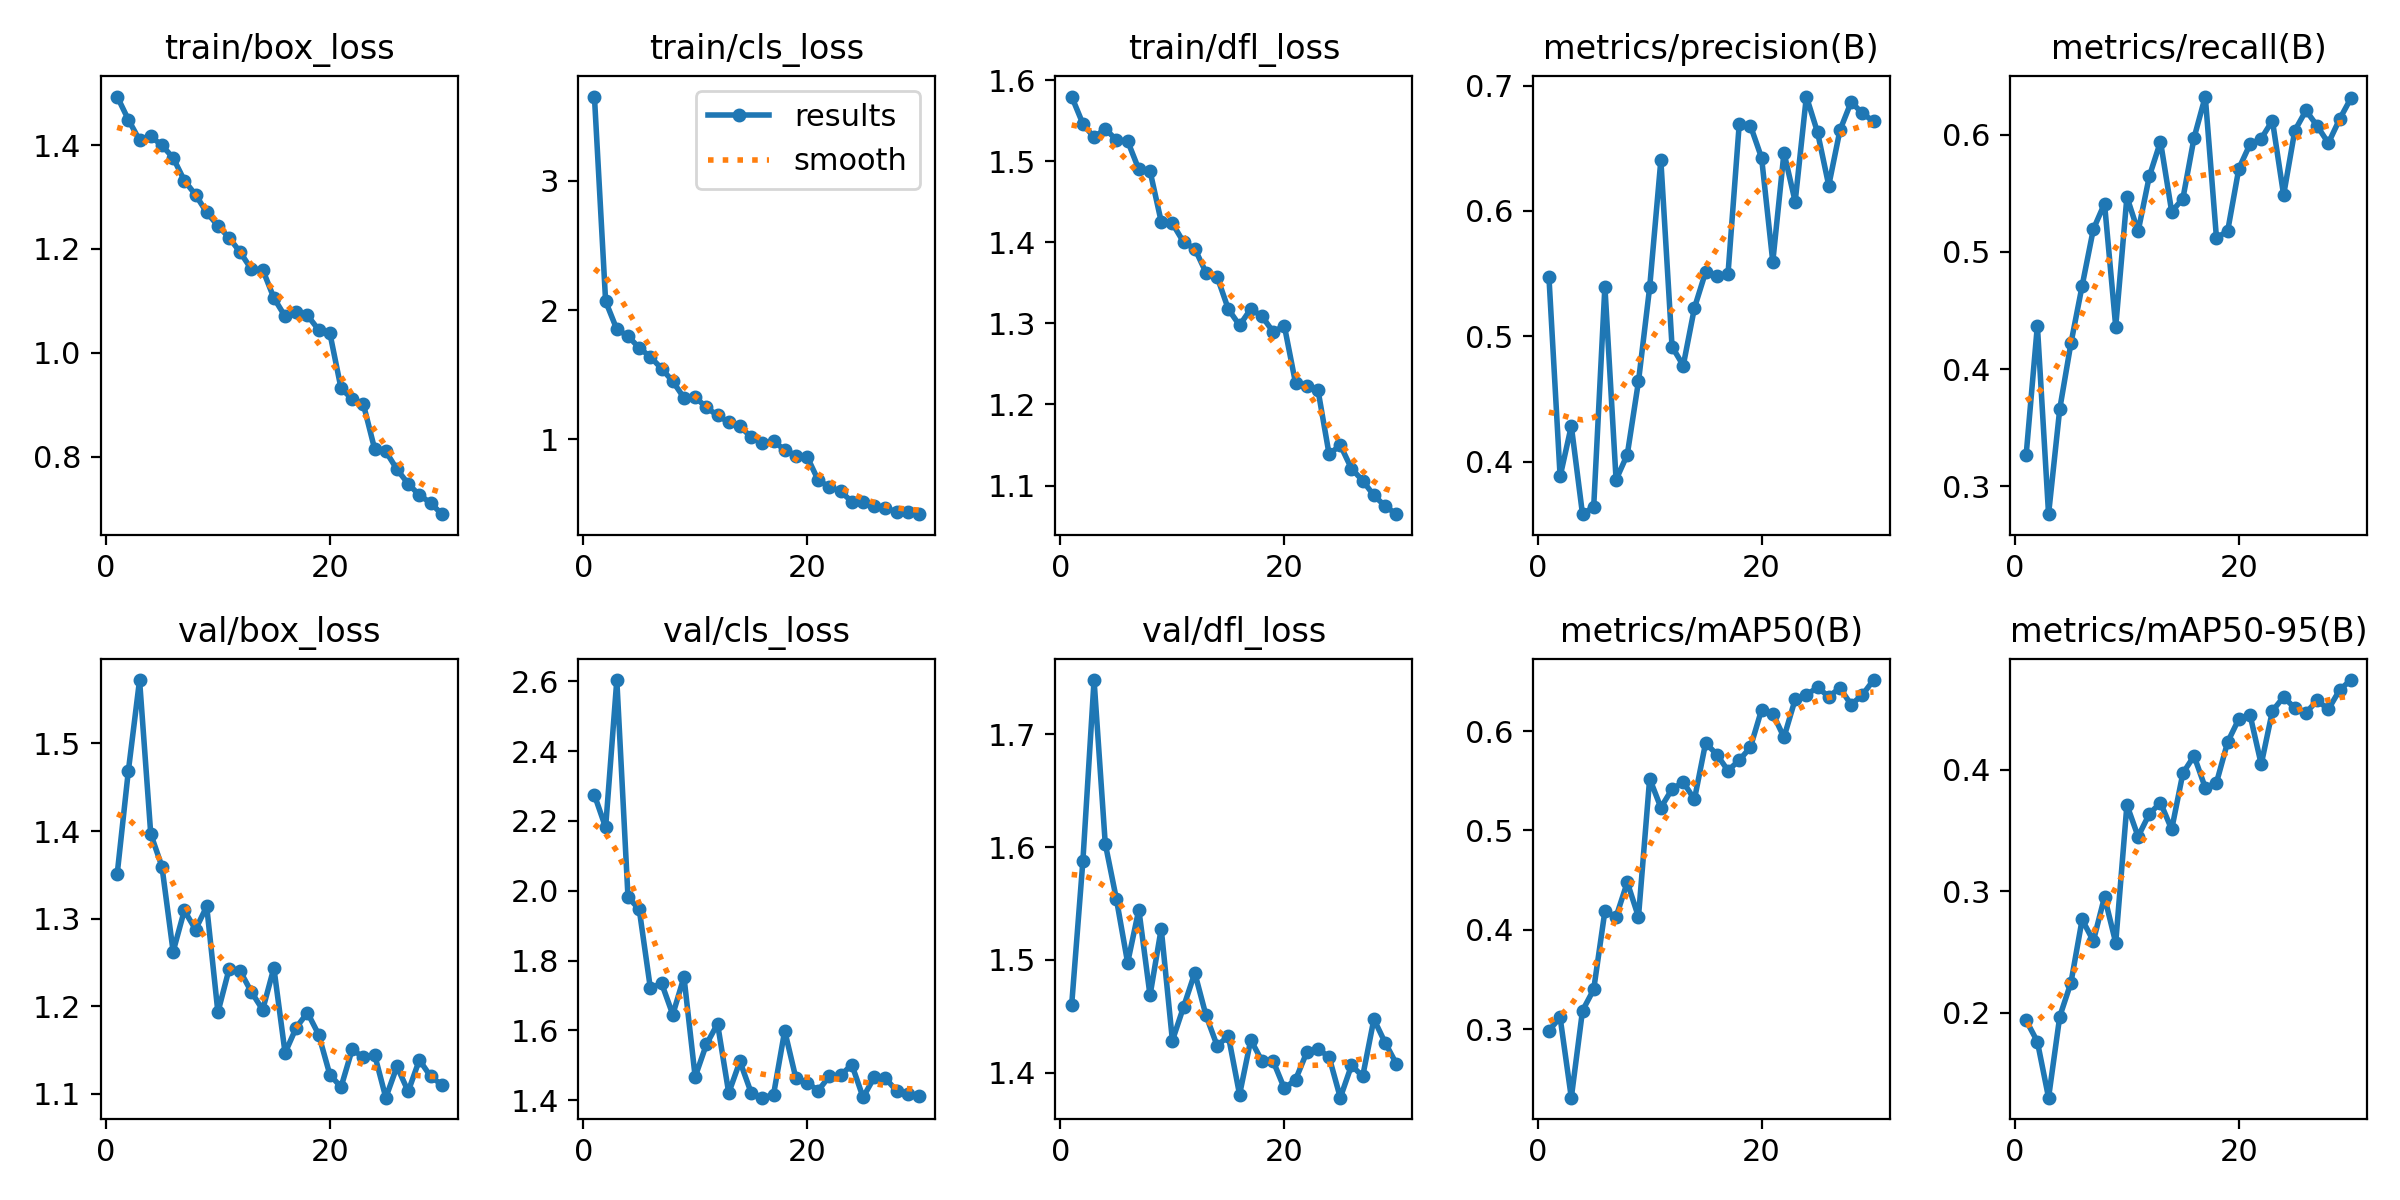

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=800)

/content


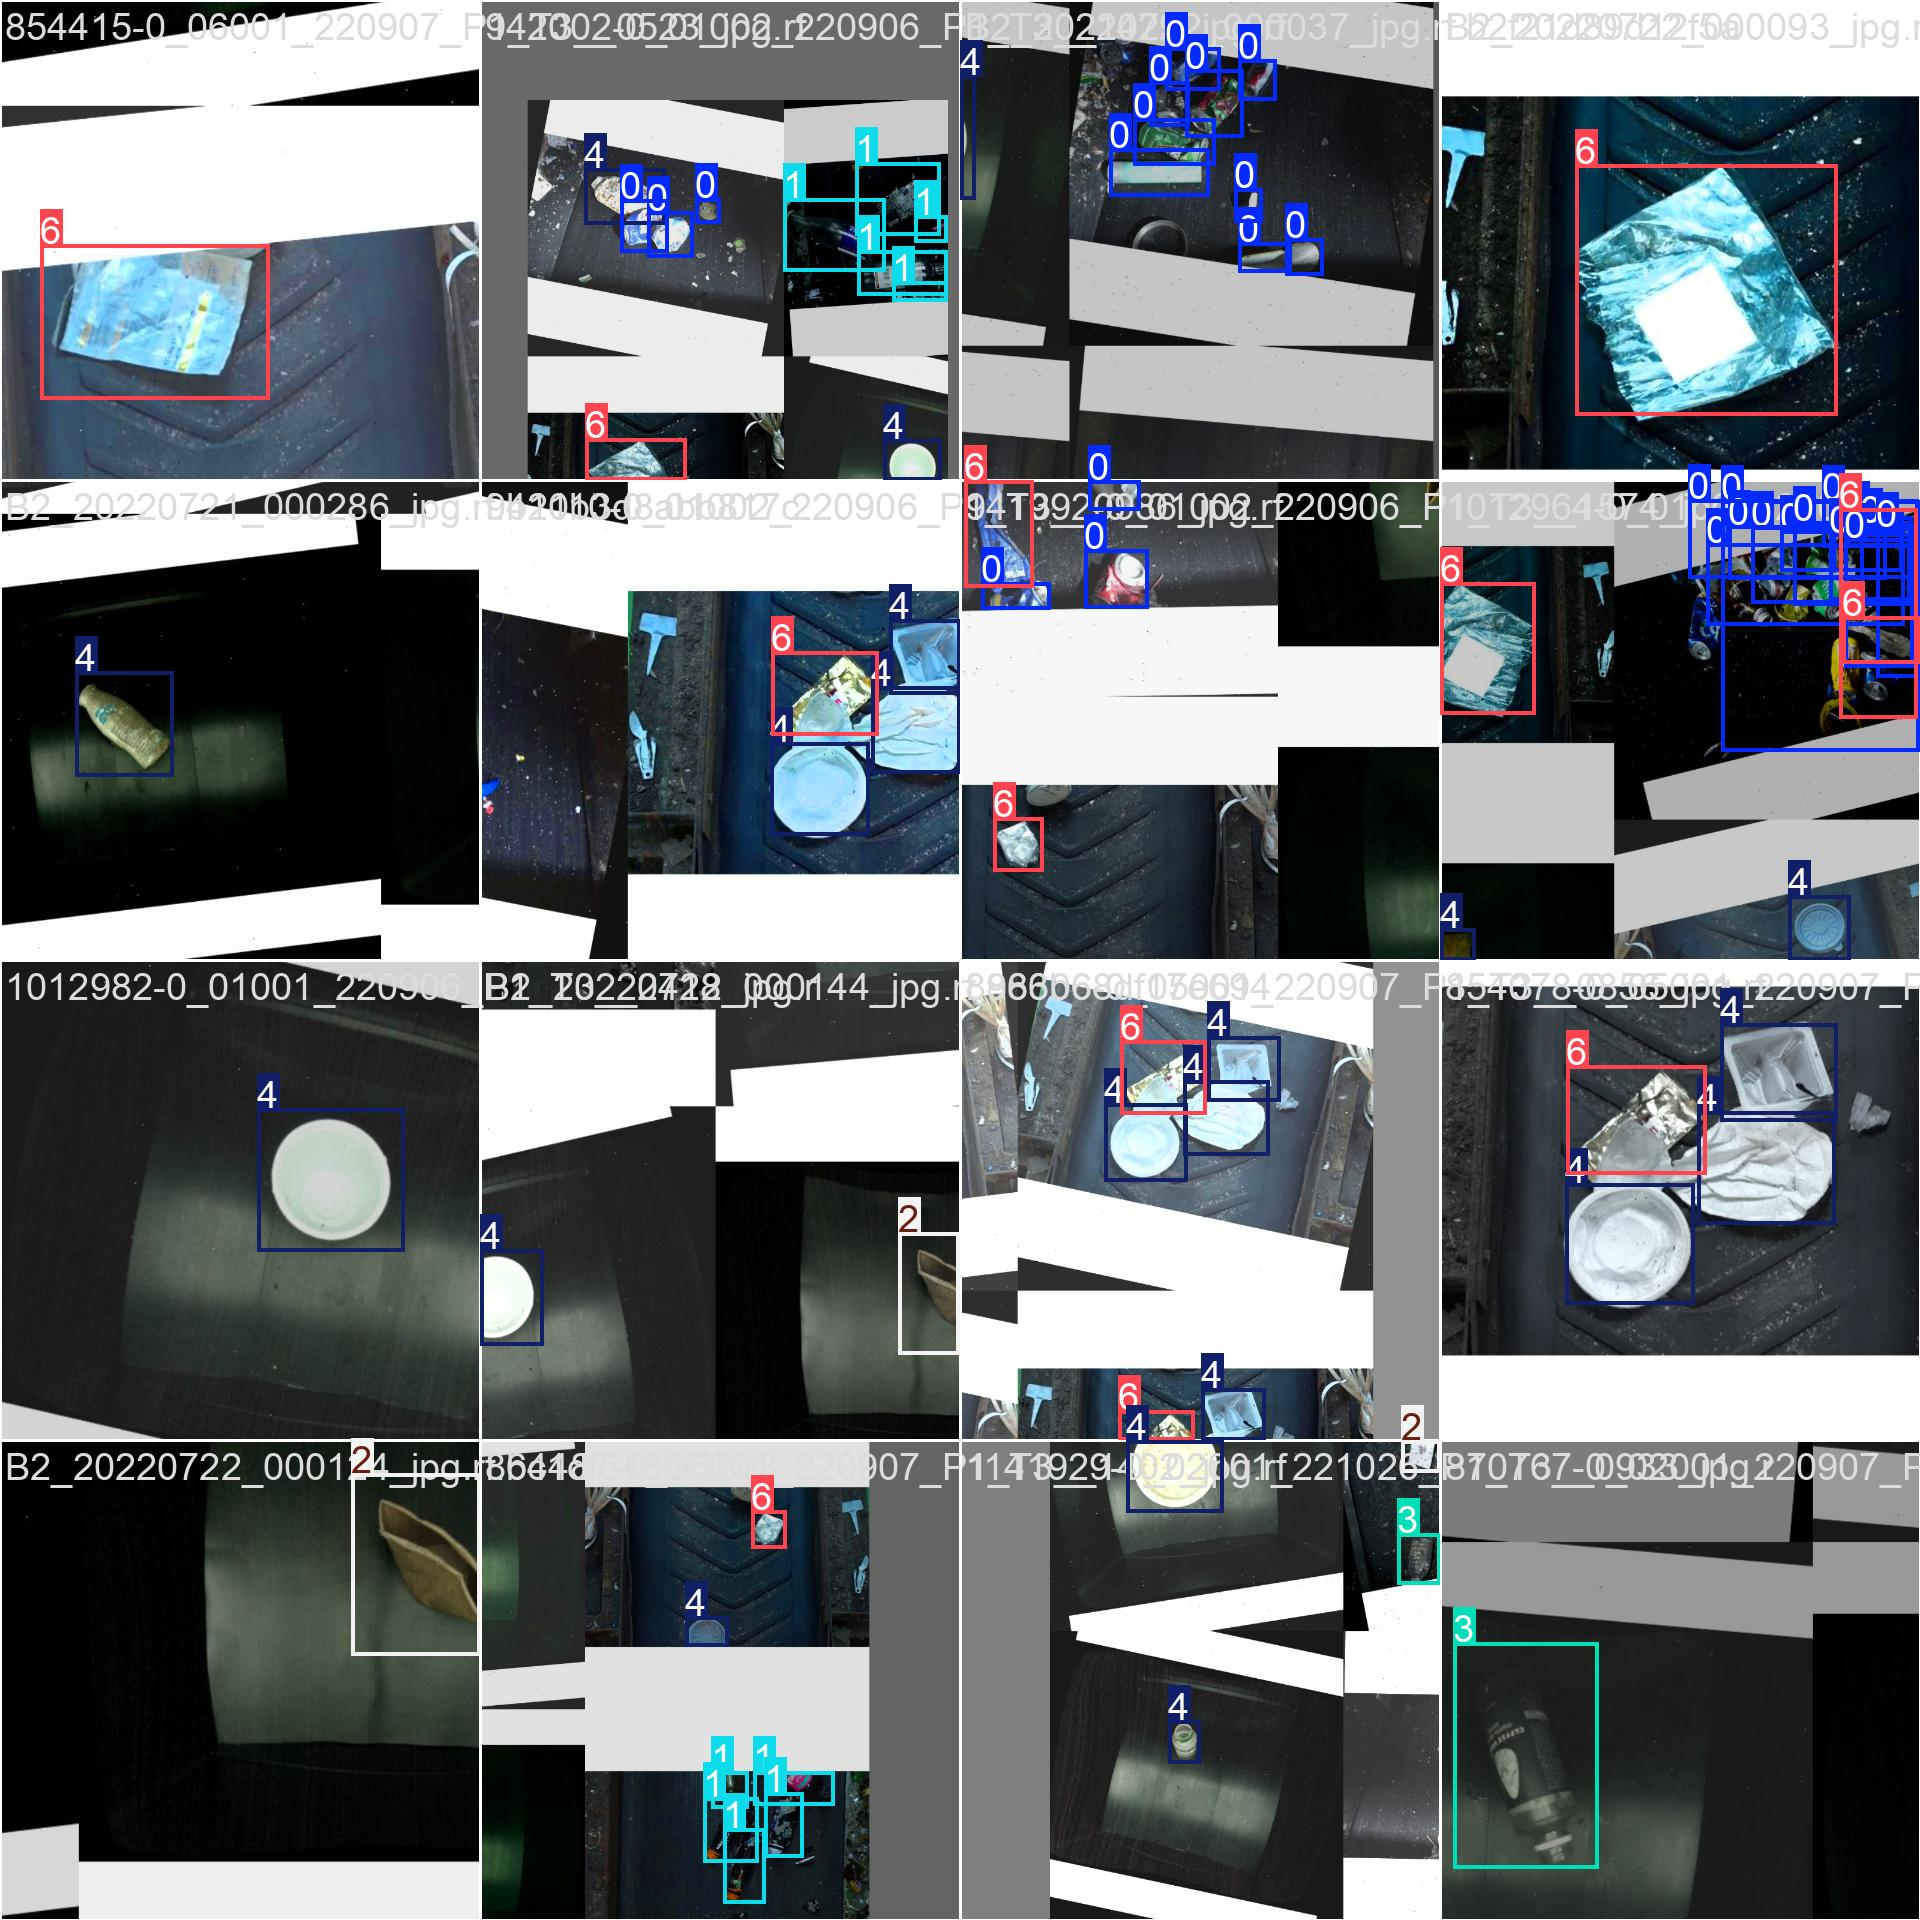

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/train_batch2.jpg', width=800)

In [32]:
%cd
!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/root
Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/8-color-bird---Waste-Detection-4/valid/labels.cache... 112 images, 1 backgrounds, 0 corrupt: 100% 112/112 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 36, len(boxes) = 277. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.05it/s]
                   all        112        277      0.672      0.631      0.651      0.473
                   can         20         65      0.812      0.692      0.795      0.543
                 glass          7         20      0.628        0.6      0.639      0.465
                 p

In [44]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [45]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [41]:
image_file = take_photo(filename='/content/real003.jpg')

<IPython.core.display.Javascript object>

In [42]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/real003.jpg

/content
Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/real003.jpg: 608x800 2 plastics, 107.1ms
Speed: 7.8ms preprocess, 107.1ms inference, 549.7ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [46]:
!pip install pickle-mixin

In [47]:
import pickle

# Load the trained weights
weights_path = '/content/runs/detect/train/weights/best.pt'  # Replace with your actual path
# Load and convert the weights to a pickle file
with open(weights_path, 'rb') as f:
    weights = f.read()
pickle.dump(weights, open('yolov8_2.pkl', 'wb'))

In [48]:
from google.colab import files
files.download('yolov8_2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>